## Face and Facial Keypoint detection

After you've trained a neural network to detect facial keypoints, you can then apply this network to *any* image that includes faces. The neural network expects a Tensor of a certain size as input and, so, to detect any face, you'll first have to do some pre-processing.

1. Detect all the faces in an image using a face detector (we'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects. This step will be similar to the `data_transform` you created and applied in Notebook 2, whose job was tp rescale, normalize, and turn any image into a Tensor to be accepted as input to your CNN.
3. Use your trained model to detect facial keypoints on the image.

---

In the next python cell we load in required libraries for this section of the project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import facial_keypoint_detecter as fkd


Importing package 'facial_keypoint_detecter'...
  + Adding module 'auxil'...
  - Done!
  + Adding module 'plots'...
  - Done!
  + Adding module 'data'...
  - Done!
  + Adding module 'model'...
  - Done!
  + Adding module 'preprocessing'...
  - Done!
Package 'facial_keypoint_detecter' imported sucessfully !!
version 1.0.0



#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

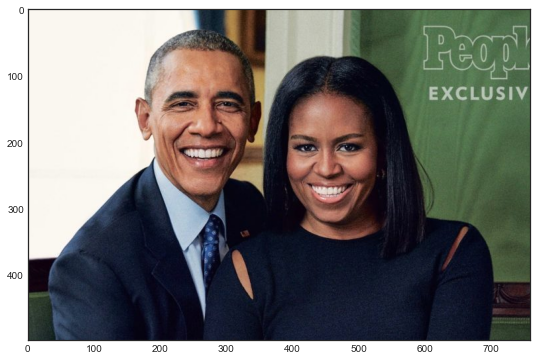

In [2]:
import cv2
# load in color image for face detection
image = cv2.imread('auxil/images/obamas.jpg')

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image_rgb)

## Detect all faces in an image

Next, you'll use one of OpenCV's pre-trained Haar Cascade classifiers, all of which can be found in the `detector_architectures/` directory, to find any faces in your selected image.

In the code below, we loop over each face in the original image and draw a red square on each face (in a copy of the original image, so as not to modify the original). You can even [add eye detections](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html) as an *optional* exercise in using Haar detectors.

An example of face detection on a variety of images is shown below.

<img src='auxil/images/haar_cascade_ex.png' width=80% height=80%/>


array([[369, 143, 162, 162],
       [178,  70, 183, 183]])

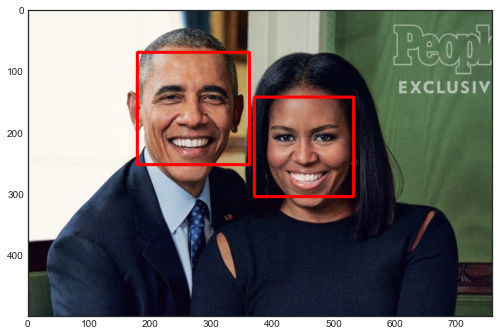

In [3]:
faces = fkd.auxil.detect_faces("auxil/images/obamas.jpg", plot_enabled = True, figsizeScale = 2.5)
faces

In [4]:
faces[0]

array([369, 143, 162, 162])

## Loading in a trained model

Once you have an image to work with (and, again, you can select any image of faces in the `images/` directory), the next step is to pre-process that image and feed it into your CNN facial keypoint detector.

First, load your best model by its filename.

In [5]:
import torch
# from models import Net

net = fkd.model.Net()
net.load_state_dict(torch.load('saved_models/20221101_02_3con_1fc_15epoch_batchSize10_cv2_lr0.0001_working.pt'))
net.eval()

Net(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc): Linear(in_features=86528, out_features=136, bias=True)
)

## Keypoint detection

Now, we'll loop over each detected face in an image (again!) only this time, you'll transform those faces in Tensors that your CNN can accept as input images.

### TODO: Transform each detected face into an input Tensor

You'll need to perform the following steps for each detected face:
1. Convert the face from RGB to grayscale
2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
3. Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
4. Reshape the numpy image into a torch image.

You may find it useful to consult to transformation code in `data_load.py` to help you perform these processing steps.


### TODO: Detect and display the predicted keypoints

After each face has been appropriately converted into an input Tensor for your network to see as input, you'll wrap that Tensor in a Variable() and can apply your `net` to each face. The ouput should be the predicted the facial keypoints. These keypoints will need to be "un-normalized" for display, and you may find it helpful to write a helper function like `show_keypoints`. You should end up with an image like the following with facial keypoints that closely match the facial features on each individual face:

<img src='auxil/images/michelle_detected.png' width=30% height=30%/>


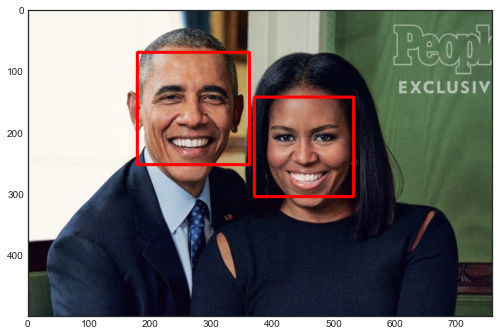

In [6]:
faces = fkd.auxil.detect_faces("auxil/images/obamas.jpg", plot_enabled = True, figsizeScale = 2.5)

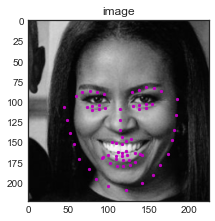

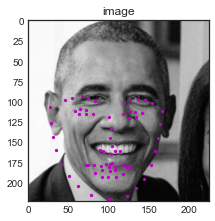

In [7]:
keypoints, images = net.detect_facial_keypoints("auxil/images/obamas.jpg", plot_enabled = True, padding = 40)

In [8]:
keypoints, images = net.detect_facial_keypoints("auxil/images/test.png", plot_enabled = True, padding = 0)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


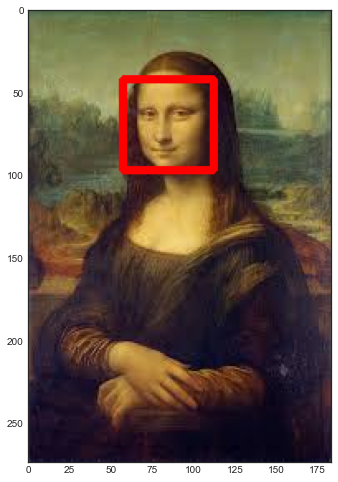

In [9]:
faces = fkd.auxil.detect_faces("auxil/images/mona_lisa.jpg", plot_enabled = True, figsizeScale = 2.5)

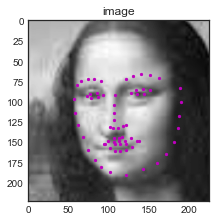

In [11]:
keypoints, images = net.detect_facial_keypoints("auxil/images/mona_lisa.jpg", plot_enabled = True, padding = 10)

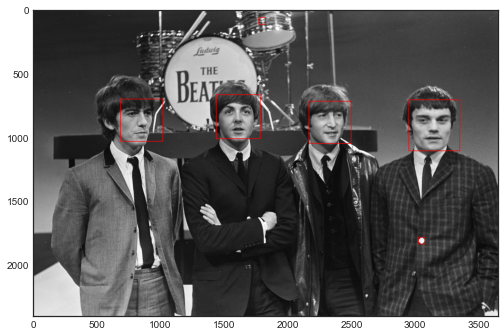

In [12]:
faces = fkd.auxil.detect_faces("auxil/images/the_beatles.jpg", plot_enabled = True, figsizeScale = 2.5)

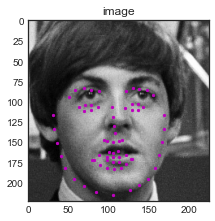

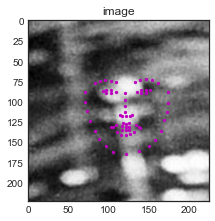

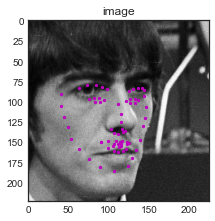

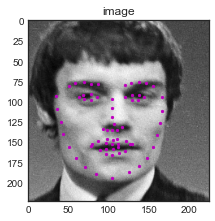

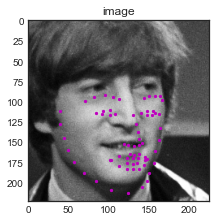

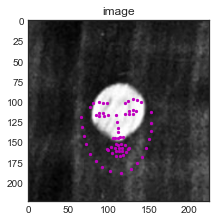

In [15]:
keypoints, images = net.detect_facial_keypoints("auxil/images/the_beatles.jpg", plot_enabled = True, padding = 50)

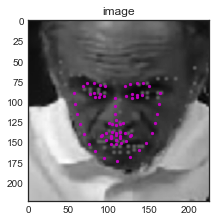

In [16]:
keypoints, images = net.detect_facial_keypoints("auxil/images/face_filter_ex.png", plot_enabled = True)

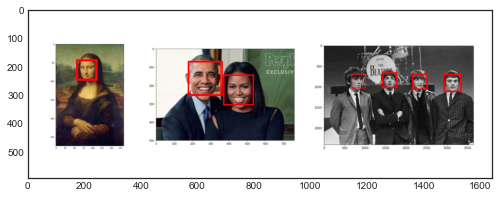

In [17]:
faces = fkd.auxil.detect_faces("auxil/images/haar_cascade_ex.png", plot_enabled = True, figsizeScale = 2.5)

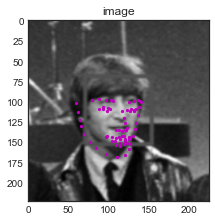

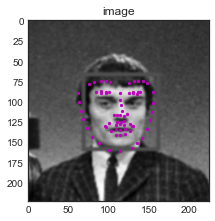

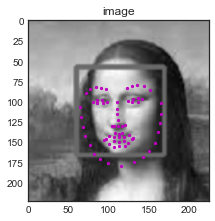

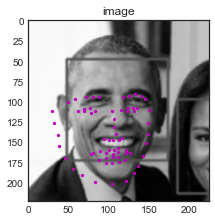

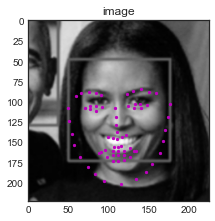

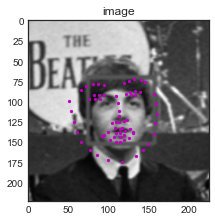

In [18]:
keypoints, images = net.detect_facial_keypoints("auxil/images/haar_cascade_ex.png", plot_enabled = True)

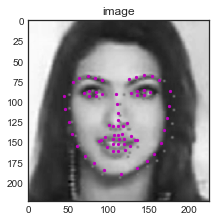

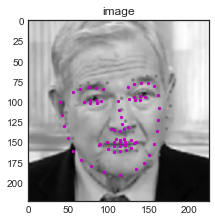

In [19]:
keypoints, images = net.detect_facial_keypoints("auxil/images/key_pts_example.png", plot_enabled = True)

In [ ]:
keypoints, images = net.detect_facial_keypoints("auxil/images/", plot_enabled = True)

In [ ]:
keypoints, images = net.detect_facial_keypoints("auxil/images/", plot_enabled = True)